![title](images_ebac.png)

___

<center><h1>Exercício 01 - Módulo 23</h1></center>
<center><h1>Bagging</h1></center>



## **Curso**: Cientista de Dados 
## **Aluno**: Victor Resende

___

### Técnicas de Ensemble

Significa um algoritmo que utiliza vários modelos em conjunto com o objetivo de obter um modelo final com melhores resultados.

**Bagging:**

**Bagging (Bootstrap Aggregating)** é uma técnica de aprendizado de máquina utilizada para aumentar a precisão de um modelo, especialmente em problemas de alta variância. Funciona criando vários subconjuntos de dados (com substituição) e treinando um modelo em cada subconjunto. O resultado final é obtido agregando os resultados dos modelos individuais. Apresenta os seguintes passos:

#### Passo 1: Criação de Subconjuntos de Dados (Bootstrap)

- A partir do conjunto de dados original, criamos vários subconjuntos (chamados de **bootstrap samples**) usando amostragem com substituição (ou seja, a mesma amostra pode aparecer mais de uma vez em um subconjunto).


#### Passo 2: Treinamento dos Modelos

- Para cada subconjunto, treinamos um modelo. Esses modelos são independentes entre si e podemos utilizar o mesmo algoritmo em cada subconjunto (por exemplo, **Decision Tree**).


#### Passo 3: Agregação dos Resultados

Após treinar todos os modelos, o resultado final é obtido pela agregação:

- Para **regressão**: a média dos resultados preditos pelos modelos.
- Para **classificação**: a votação majoritária (onde a classe mais votada entre os modelos é a escolhida).


#### Passo 4: Avaliação

- Após a agregação, o modelo final pode ser avaliado com base em métricas de desempenho como **acurácia (classificação)** ou **erro quadrático médio (regressão)**.

#### Resumo da ópera:

**Bagging** é uma técnica de ensemble que ajuda a reduzir a variância de um modelo. A ideia é treinar vários modelos, cada um em diferentes amostras geradas com substituição (bootstrap). Esses modelos podem cometer erros diferentes, já que veem diferentes versões dos dados. No final, seus resultados são combinados (via votação ou média) para melhorar a robustez e a generalização do modelo. É uma maneira eficaz de transformar modelos altamente variáveis, como árvores de decisão, em modelos mais estáveis e precisos.

#### Exemplo:

#### Implementação de Bagging com os três componentes: Bootstrap, Modelagem e Agregação.

In [42]:
#Carregando os pacores necessários:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 1. Bootstrap (Amostragem com substituição) Bootstrap: 
# A função bootstrap_sample é responsável por criar subconjuntos de dados (amostragem com substituição).
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[idxs], y[idxs]

# 2. Bagging Model:
# A classe BaggingClassifier treina vários modelos em diferentes subconjuntos de dados.
class BaggingClassifier:
    def __init__(self, base_model, n_estimators):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        # Treina n modelos com diferentes amostras bootstrap
        for _ in range(self.n_estimators):
            X_bootstrap, y_bootstrap = bootstrap_sample(X, y)
            model = self.base_model()
            model.fit(X_bootstrap, y_bootstrap)
            self.models.append(model)

# 3. Agregação:
#  A agregação é feita com uma votação majoritária dos modelos na função predict.
    def predict(self, X):
        # 3. Agregação (Votação majoritária)
        predictions = np.array([model.predict(X) for model in self.models])
        return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions))

# 4. Carregando os dados:
data = load_iris()
X, y = data.data, data.target

# Dividindo em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Instanciando o BaggingClassifier com árvore de decisão como modelo base:
bagging_model = BaggingClassifier(base_model=DecisionTreeClassifier, n_estimators=10)

# Treinando o modelo:
bagging_model.fit(X_train, y_train)

# Previsões no conjunto de teste:
y_pred = bagging_model.predict(X_test)

# Avaliação do modelo:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Bagging: {accuracy:.2f}')


Acurácia do modelo Bagging: 1.00


### Exemplo 02: com a visualização dos dados

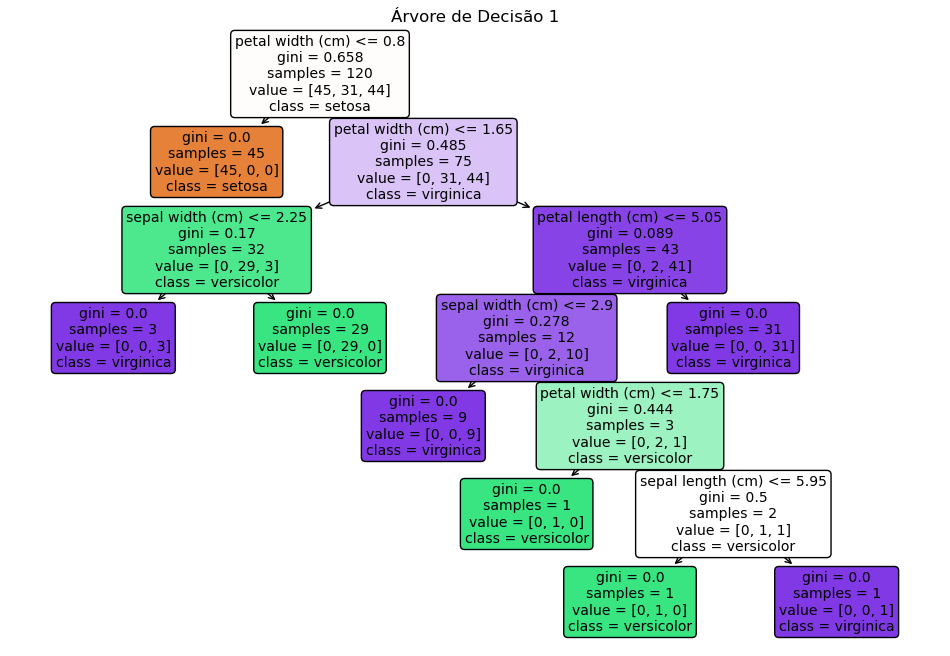

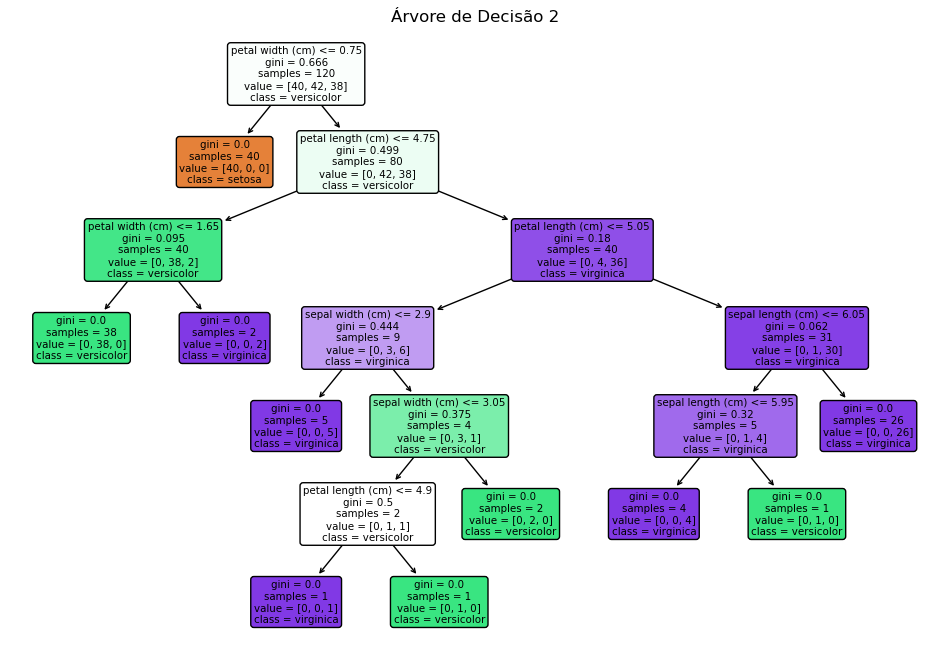

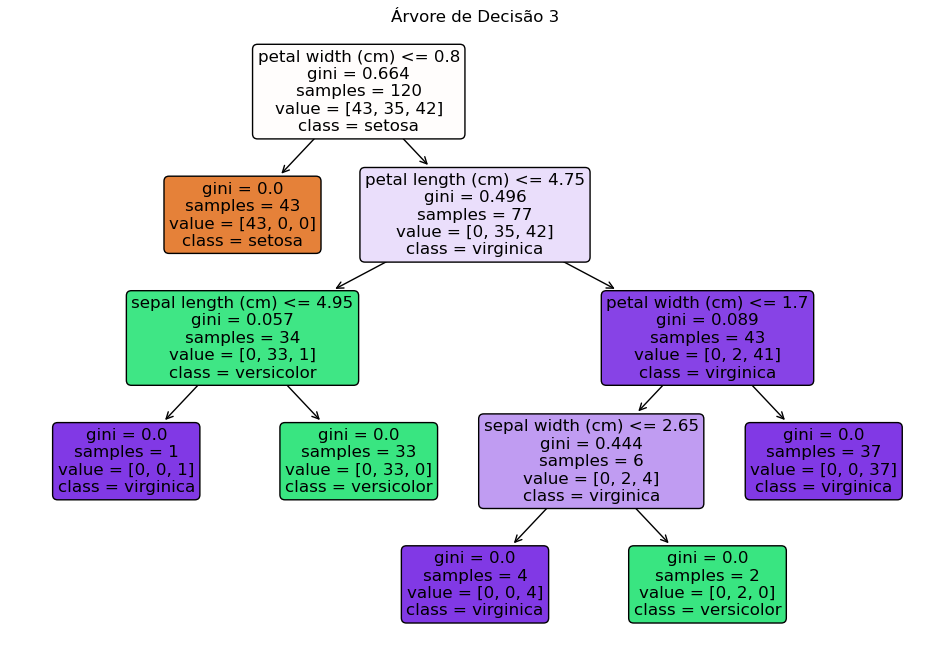

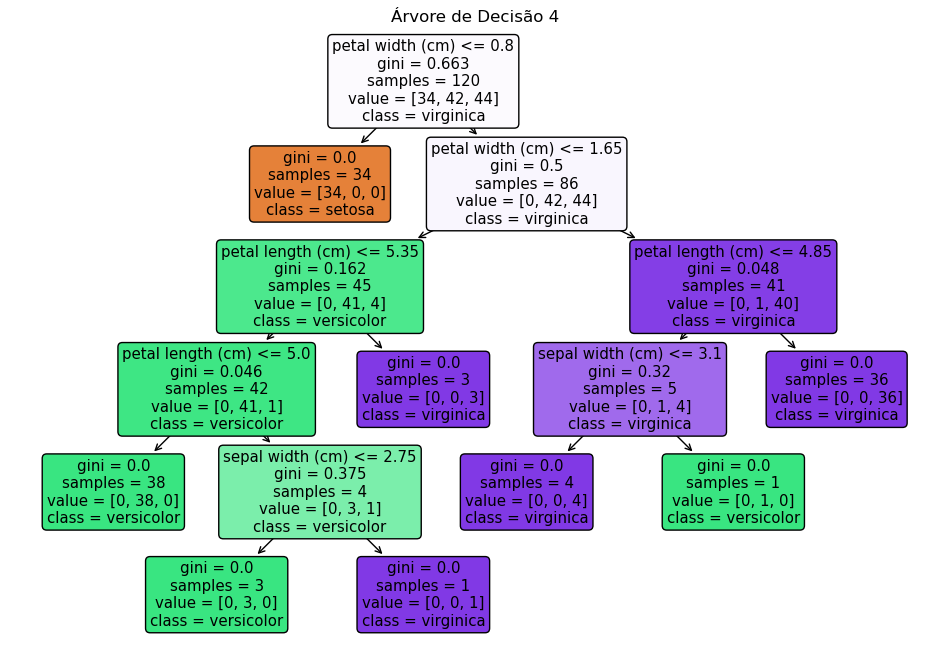

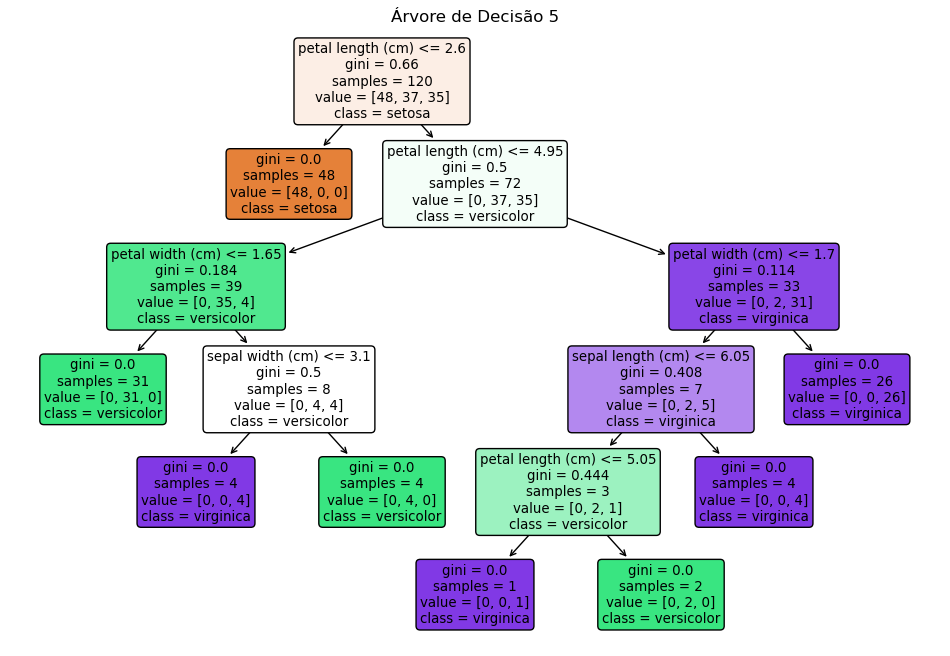

Acurácia do modelo Bagging: 1.00


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


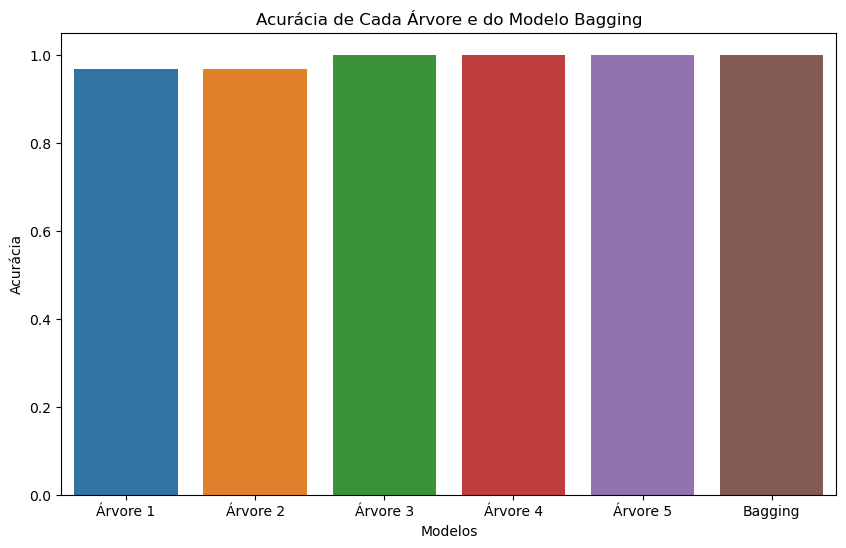

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

# 1. Bootstrap (Amostragem com substituição)
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[idxs], y[idxs]

# 2. Bagging Model com visualização
class BaggingClassifierWithVisualization:
    def __init__(self, base_model, n_estimators):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []
        self.accuracies = []

    def fit(self, X, y, X_test, y_test):
        # Treina n modelos com diferentes amostras bootstrap e armazena a acurácia
        for i in range(self.n_estimators):
            X_bootstrap, y_bootstrap = bootstrap_sample(X, y)
            model = self.base_model(random_state=i)  # Adiciona random_state para reprodutibilidade
            model.fit(X_bootstrap, y_bootstrap)
            self.models.append(model)

            # Calcula acurácia individual de cada árvore
            y_pred_tree = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred_tree)
            self.accuracies.append(accuracy)
            
            # Visualizar a árvore
            plt.figure(figsize=(12, 8))
            plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
            plt.title(f'Árvore de Decisão {i+1}')
            plt.show()

    def predict(self, X):
        # Agregação (Votação majoritária)
        predictions = np.array([model.predict(X) for model in self.models])
        return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions))

# 3. Carregar dados
data = load_iris()
X, y = data.data, data.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Instanciar o BaggingClassifier com visualização
bagging_model = BaggingClassifierWithVisualization(base_model=DecisionTreeClassifier, n_estimators=5)

# Treinar o modelo e visualizar as árvores
bagging_model.fit(X_train, y_train, X_test, y_test)

# Previsões no conjunto de teste com o modelo Bagging
y_pred = bagging_model.predict(X_test)

# Avaliação do modelo agregado (Bagging)
accuracy_bagging = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Bagging: {accuracy_bagging:.2f}')

# 5. Plotar acurácia de cada árvore e do modelo Bagging
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"Árvore {i+1}" for i in range(bagging_model.n_estimators)] + ['Bagging'],
            y=bagging_model.accuracies + [accuracy_bagging])
plt.title('Acurácia de Cada Árvore e do Modelo Bagging')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.show()


### Análises:

- O gráfico de barras mostra as acurácias de cada árvore individual e a acurácia do modelo agregado (Bagging), o que ajuda a entender como a agregação dos modelos melhora o desempenho.
- Cada árvore de decisão está desenhada com seus splits e nós.
- **Gráfico de Acurácia**: o gráfico de barras mostra o desempenho das árvores individualmente e do modelo Bagging.

______